In [1]:
import torch 
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_path = "ho.pth.tar"
image_path = "../../../DATA/CG_Final_face_gan_data/origin/male/000205.jpg"

In [3]:
model = torch.load(model_path)

In [23]:
imageA = cv2.imread(image_path)
imageB = cv2.imread(image_path)

In [62]:
def get_transform():
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    return transform
tran = get_transform()

In [37]:
data = {"A_paths":"", "B_paths": ""}
data['A'] = torch.unsqueeze(tran(imageA), 0)
data['B'] = torch.unsqueeze(tran(imageB), 0)
print(data['A'].size())
print(data['B'].size())

torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


In [38]:
model.set_input(data)  # unpack data from data loader
model.test()           # run inference
visuals = model.get_current_visuals()  # get image results

In [41]:
visuals['fake_B'].size()

torch.Size([1, 3, 256, 256])

In [59]:
fake = visuals['fake_B'].squeeze(0).cpu().numpy()

In [60]:
fake=np.swapaxes(fake,0,1)
fake=np.swapaxes(fake,1,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


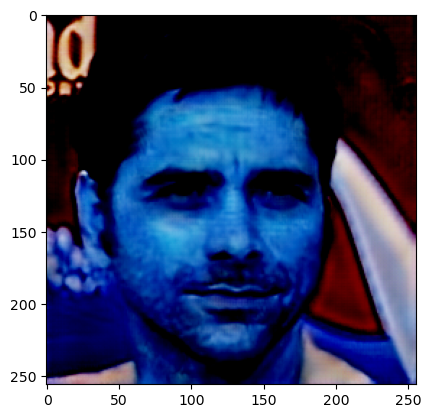

In [61]:
plt.imshow(fake)
plt.show()

In [4]:
def converFace(model, image):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    data = {"A_paths":"", "B_paths": ""}
    data['A'] = torch.unsqueeze(transform(image), 0)
    data['B'] = torch.unsqueeze(transform(image), 0)
    model.set_input(data)  # unpack data from data loader
    model.test()           # run inference
    visuals = model.get_current_visuals()  # get image results
    fake = visuals['fake_B'].squeeze(0).cpu().numpy()
    fake=np.swapaxes(fake,0,1)
    fake=np.swapaxes(fake,1,2)
    return fake

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


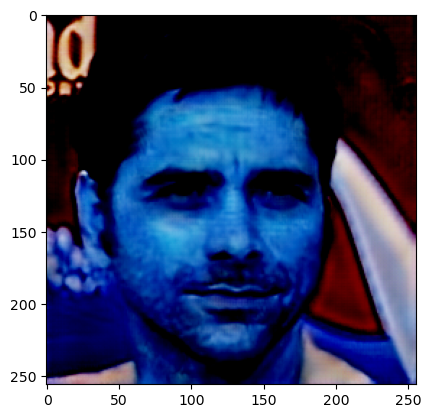

In [68]:
model_path = "ho.pth.tar"
image_path = "../../../DATA/CG_Final_face_gan_data/origin/male/000205.jpg"
image = cv2.imread(image_path)
model = torch.load(model_path)
result = converFace(model, imageA)
plt.imshow(result)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


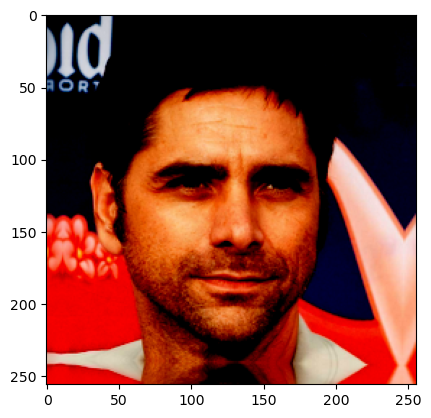

In [9]:
from models.wing import align_face
model_path ="./wing.ckpt" 
lm_path = "./celeba_lm_mean.npz"
image_size = 256
image = cv2.imread(image_path)
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
align_result = align_face(model_path, lm_path, image_size, im_rgb).squeeze(0).cpu().numpy()
align_result=np.swapaxes(align_result,0,1)
align_result=np.swapaxes(align_result,1,2)
plt.imshow(align_result)
plt.show()